## Other than the obvious tasks of producing visual representations of the data, as decreed by the assignment, these are components that are even more important for me:

1. continual use and practice of Graphlab Create
2. use of seaborn to replace the standard esthetics of matplotlib

In [104]:
import graphlab as gl
import graphlab.aggregate as agg

#gl.product_key.set_product_key('6E19-9A71-9128-0AD3-AA0C-8C21-8919-1180')

gl.canvas.set_target('ipynb') # output a single GraphLab Canvas view to a IPython Notebook cell

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
import seaborn as sns
sns.set()

In [3]:
sf = gl.SFrame.read_csv('../data/sanfrancisco_incidents_summer_2014.csv')
#sea = gl.SFrame.read_csv('data/seattle_incidents_summer_2014.csv')

[INFO] 1449772357 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/certifi/cacert.pem
1449772357 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to studiocardo@gmail.com and will expire on November 14, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-26369 - Server binary: /Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1449772357.log
[INFO] GraphLab Server Version: 1.7.1


PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.394961 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 28993 lines in 0.250236 secs.
PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/data/seattle_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.33713 secs.
------------------------------------------------------
Inferred typ

In [4]:
sf.column_names()

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

___
### Let's get a quick overlook of the SF crime statistics

In [5]:
sf.show()

### The tool makes it easy to see how the crime incidents spread across different PD districts.  But we are going to do things the hard way by exacting the data and plot it 

In [77]:
sf_PdDistrict = sf.groupby(["PdDistrict"], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

In [78]:
min=sf_PdDistrict['Counts'].min()
sf_PdDistrict['normalized']=sf_PdDistrict['Counts'].apply(lambda x: float(x)/min).apply(lambda x: round(x, 2))

In [79]:
sf_PdDistrict.sort('normalized', ascending=False)
sf_PdDistrict['normalized']

dtype: float
Rows: 10
[3.71, 2.39, 2.32, 2.27, 1.76, 1.54, 1.46, 1.2, 1.1, 1.0]

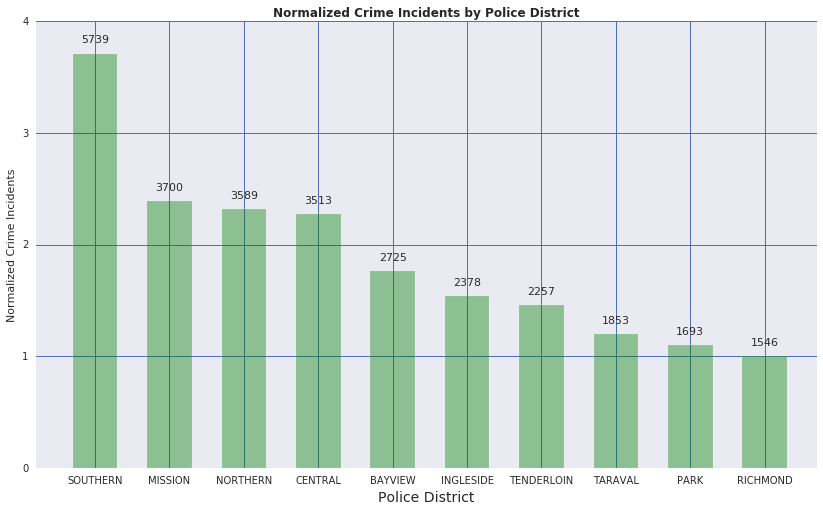

In [225]:
# Matplotlib
#
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14.0, 8.0)

# Numpy
import numpy as np

#
# Determine how wide each bar should appear.  A rough estimate w/ fudge factor
index = np.arange(len(sf_PdDistrict))
width = 1.0 / len(index) * 6.

# The Data used for this plot
crime_bar = plt.bar(index, sf_PdDistrict["normalized"], width, color='green', edgecolor='white', alpha=0.4)

# For the whole plot
plt.title('Normalized Crime Incidents by Police District', fontsize=12, weight='bold')

# X-axis
plt.ylabel('Normalized Crime Incidents')
plt.xlabel('Police District', fontsize=14)
plt.xticks(index + width/2., sf_PdDistrict['PdDistrict'], fontsize=10)
plt.xlim(-0.5, sf_PdDistrict.num_rows())

# Y-axis
ymin = 0
ymax = round(sf_PdDistrict['normalized'].max(), 0)
ytic = round((ymax-ymin) / 5., 0)
plt.yticks(np.arange(ymin,ymax+1,ytic))
plt.grid(b=True, which='major', color='b', linestyle='-')

# Display the actual crime incident at the top of each bar
for ind in np.arange(len(sf_PdDistrict)):
    ind = int(ind)
    x = 0 + ind + width / 2.
    y = sf_PdDistrict['normalized'][ind] + 0.1
    d = sf_PdDistrict['Counts'][ind]
    plt.text(x, y, d, fontsize=11, ha='center')

## Categories of Crime by PdDistrict

While Figure 1 shows a nice summary of the total number of reported crimes by PdDistrict.  I think it would be interesteing to also find out exactly what the top 5 categories are in each PdDistrict and what proportions they occupy.

So.

We need to:

1. arrange by PdDistrict and then by Category
2. select only the top 5 categories and group the incidents from remaining categories into one bucket called Others
3. plot the bar chart like Figure 1 but each bar would have different colors showing different categories
4. sort in such way that the top category will be at the highest position on the bar stack.


### 1. arrange by PdDistrict and then by Category

In [185]:
# 1. arrange by PdDistrict and then by Category

sf_PdDistrict_pd = sf.groupby(["PdDistrict",'Category'], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

#
# convert SFrame to a Pandas DF so we can utilize the plotting utils
#
#sf_PdDistrict_pd = gl.SFrame.to_dataframe(sf_PdDistrict_pd)
sf_PdDistrict_pd

Category,PdDistrict,Counts
LARCENY/THEFT,SOUTHERN,2562
LARCENY/THEFT,CENTRAL,1574
LARCENY/THEFT,NORTHERN,1499
LARCENY/THEFT,MISSION,671
NON-CRIMINAL,SOUTHERN,639
LARCENY/THEFT,PARK,576
LARCENY/THEFT,INGLESIDE,548
LARCENY/THEFT,TARAVAL,547
OTHER OFFENSES,SOUTHERN,543
ASSAULT,SOUTHERN,528


### I found the top 5 categories and the remaining for all PdDistricts here 

and put them into a new SF called counts_sf

In [186]:
# Create an empty pandas DF
#
counts_sf = gl.SFrame()
sfpd = sf_PdDistrict['PdDistrict']

for p in sfpd:
    this_p = sf_PdDistrict_pd.filter_by(p, 'PdDistrict').sort('Counts', ascending=False)
    top5 = this_p.head(5)
    others = this_p['Counts'][5:len(this_p)].sum()
    rest = gl.SFrame({'Category': ["Rest"], 'PdDistrict': [p], 'Counts': [others]})
    top5 = top5.append(rest)
    counts_sf = counts_sf.append(top5)

sfpd

dtype: str
Rows: 10
['SOUTHERN', 'MISSION', 'NORTHERN', 'CENTRAL', 'BAYVIEW', 'INGLESIDE', 'TENDERLOIN', 'TARAVAL', 'PARK', 'RICHMOND']

#### Hard to plot the way we want w/ SFrame...  Need to conver to a table format in Pandas

In [187]:
import pandas as pd
cats = counts_sf['Category'].unique()

df = pd.DataFrame(index=sfpd, columns=cats)
df = df.fillna(0)
#df['ASSAULT']['SOUTHERN']

counts_pd = gl.SFrame.to_dataframe(counts_sf)

for c in cats:
    temp = counts_sf.filter_by(c, 'Category')
    for p in sfpd:
        x = temp.filter_by(p, 'PdDistrict')['Counts'].sum()  # I tried.. x is a SArray, so just sum it to get an int
        
        x = int(0 if x is None else x) #if int(x) > 0:
        df[c][p] = x


In [188]:
df.index

Index([u'SOUTHERN', u'MISSION', u'NORTHERN', u'CENTRAL', u'BAYVIEW',
       u'INGLESIDE', u'TENDERLOIN', u'TARAVAL', u'PARK', u'RICHMOND'],
      dtype='object')

In [189]:
# Need to overwrite the existing numberical index with the PdDistrict
# It's easier to do so after you have done the SFrame->DF conversion
#
counts_pd = gl.SFrame.to_dataframe(counts_sf)

counts_pd = counts_pd.set_index(counts_pd['PdDistrict'])

# Necessary step otherwise...  You'll see if you don't add this step
#
counts_pd.index.name=None

In [190]:
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

#
# http://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas
#

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * (i / n_col))
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

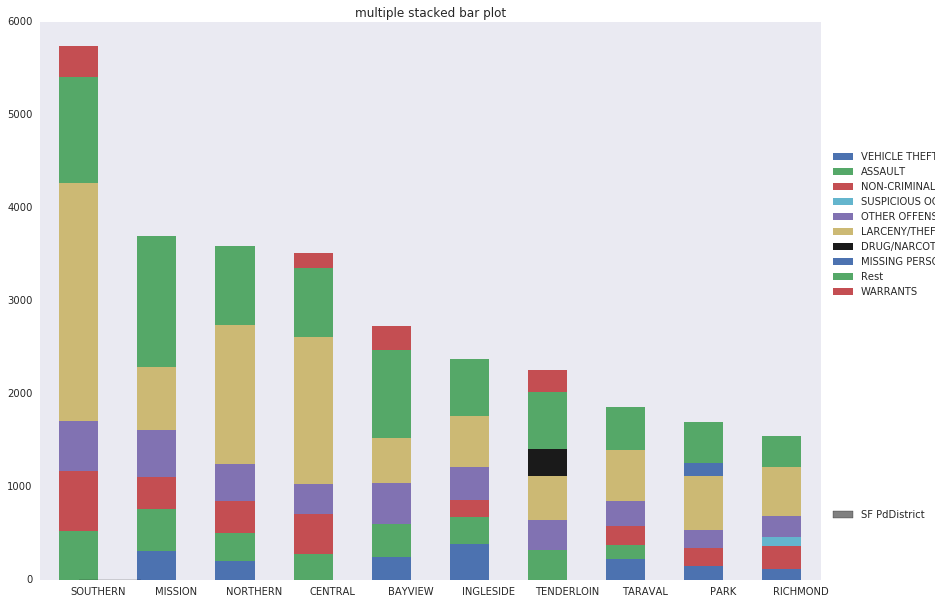

In [226]:
fig_size = plt.rcParams["figure.figsize"]
fig_size

# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plot_clustered_stacked([df],["SF PdDistrict"])


## Now let's see what is going on in Southern PD from a different plot style

In [230]:
# Get the top 6 categories within this PdDistrict
#
sf_cat = sf.groupby('Category', agg.COUNT).sort('Count', ascending=False)
top_cat = sf_cat['Category'][0]

In [231]:
top_descript_in_top_cat = gl.SFrame()
top_descript_in_top_cat = sf.filter_by(top_cat, 'Category').groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [232]:
# Get the top 6 categories within this PdDistrict
#
rest_count = top_descript_in_top_cat['Count'][5:len(top_descript_in_top_cat)].sum()

In [233]:
top5_descript_in_top_cat = gl.SFrame()
top5_descript_in_top_cat = top_descript_in_top_cat.head(5)

In [234]:
rest = gl.SFrame({'Descript': ["Rest"], 'Count': [rest_count]})
rest

Count,Descript
2454,Rest


___
### What is the heck goes on in the Southern PD District?
Let's break down the crime category in the Southern PD District and plot them out

In [235]:
top5_descript_in_top_cat = top5_descript_in_top_cat.append(rest)

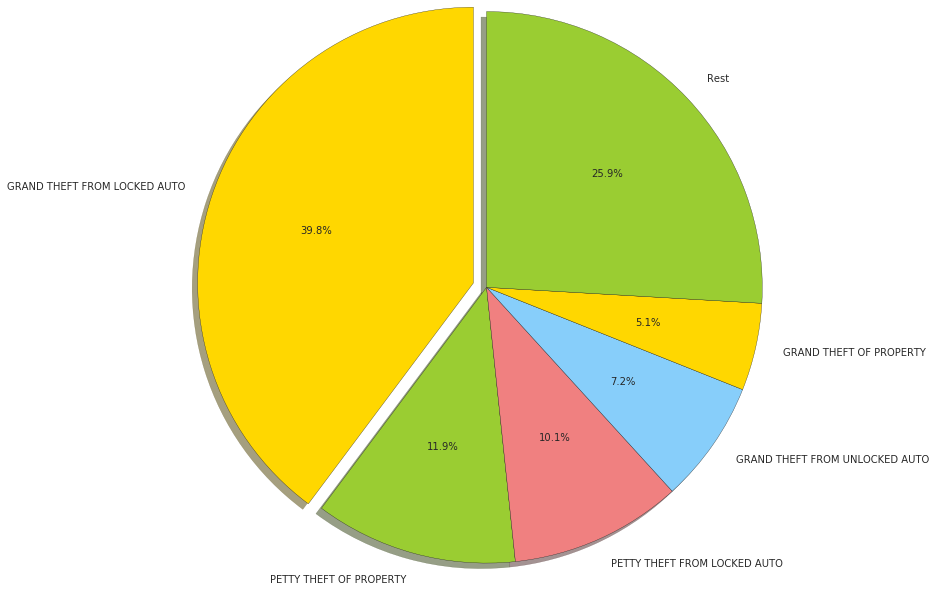

In [237]:
labels = top5_descript_in_top_cat['Descript']
data = top5_descript_in_top_cat['Count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' ]
explode = [0] * top5_descript_in_top_cat.num_rows()
explode[0] = 0.05

plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

___
## Have your stuff stolen from your car

Everyone who's ever lived in a major city most likely has his/her car broken in once or twice or more time.  The general intuition suggests that the time of the day and the location where you park have a lot to do with the chance of getting your car broken in.  Let's take a look at the date to see if that intuition holds.



In [238]:
def timegrp(time):
    breaks = ["00:00", "02:00", "04:00", "06:00", "08:00", "10:00", "12:00","14:00", "16:00", "18:00", "20:00", "22:00", "24:00"]
    
    if ((time >= breaks[0]) & (time<breaks[1])):
        return "00-02"
    elif ((time >= breaks[1]) & (time<breaks[2])):
        return "02-04"
    elif ((time >= breaks[2]) & (time<breaks[3])):
        return "04-06"
    elif ((time >= breaks[3]) & (time<breaks[4])):
        return "06-08"
    elif ((time >= breaks[4]) & (time<breaks[5])):
        return "08-10"
    elif ((time >= breaks[5]) & (time<breaks[6])):
        return "10-12"
    elif ((time >= breaks[6]) & (time<breaks[7])):
        return "12-14"
    elif ((time >= breaks[7]) & (time<breaks[8])):
        return "14-16"
    elif ((time >= breaks[8]) & (time<breaks[9])):
        return "16-18"
    elif ((time >= breaks[9]) & (time<breaks[10])):
        return "18-20"
    elif ((time >= breaks[10]) & (time<breaks[11])):
        return "20-22"
    else:
        return "20-24"
    
sf['Timegrp'] = sf['Time'].apply(timegrp)
temp=sf.groupby('Timegrp', agg.COUNT).sort('Timegrp')
temp

Timegrp,Count
00-02,2202
02-04,1067
04-06,537
06-08,996
08-10,2018
10-12,2504
12-14,3151
14-16,3038
16-18,3670
18-20,3703


In [239]:
key = ["GRAND THEFT FROM LOCKED AUTO", "PETTY THEFT FROM LOCKED AUTO"]
theft_auto = sf.filter_by(key, 'Descript')
theft_auto_resolve = theft_auto.groupby('Resolution', agg.COUNT).sort('Count', ascending=False)

In [240]:
# Here's a break down of the theft from auto by PdDistrict
#
theft_auto_pddistrict = theft_auto.groupby('PdDistrict', agg.COUNT).sort('Count', ascending=False)
theft_auto_pddistrict

PdDistrict,Count
SOUTHERN,1278
NORTHERN,867
CENTRAL,795
PARK,326
RICHMOND,295
INGLESIDE,288
MISSION,257
BAYVIEW,247
TARAVAL,240
TENDERLOIN,128


In [241]:
# So, what is the "resolution" rate of a theft from a locked auto case?
#

theft_auto_resolve

Resolution,Count
NONE,4684
"ARREST, BOOKED",32
JUVENILE CITED,1
COMPLAINANT REFUSES TOPROSECUTE ...,1
PROSECUTED BY OUTSIDEAGENCY ...,1
UNFOUNDED,1
"ARREST, CITED",1


In [242]:
theft_auto_size = theft_auto.groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [187]:
# What's the divide b/n Grand vs. Petty theft from locked autos?
# See http://www.avvo.com/legal-guides/ugc/whats-the-difference-between-grand-theft-and-petty-theft
#

theft_auto_size

Descript,Count
GRAND THEFT FROM LOCKEDAUTO ...,3766
PETTY THEFT FROM LOCKEDAUTO ...,955


In [188]:
#by_age = trainSF_a.groupby(["Survived", "Age_grp"], {'count':gl.aggregate.COUNT()}).sort('Age_grp')

theft_auto_td = theft_auto.groupby(['PdDistrict', 'Timegrp'], agg.COUNT('Count')).sort('Count', ascending=False)
theft_auto_td

PdDistrict,Timegrp,Count
SOUTHERN,18-20,292
SOUTHERN,20-22,221
SOUTHERN,20-24,178
NORTHERN,20-22,178
NORTHERN,18-20,163
CENTRAL,18-20,152
SOUTHERN,16-18,132
CENTRAL,20-22,127
SOUTHERN,12-14,106
CENTRAL,20-24,106


In [189]:
theft_auto_time = theft_auto.groupby(['Timegrp'], agg.COUNT('Count')).sort('Timegrp')
theft_auto_time

Timegrp,Count
00-02,249
02-04,97
04-06,55
06-08,102
08-10,204
10-12,341
12-14,415
14-16,402
16-18,512
18-20,935


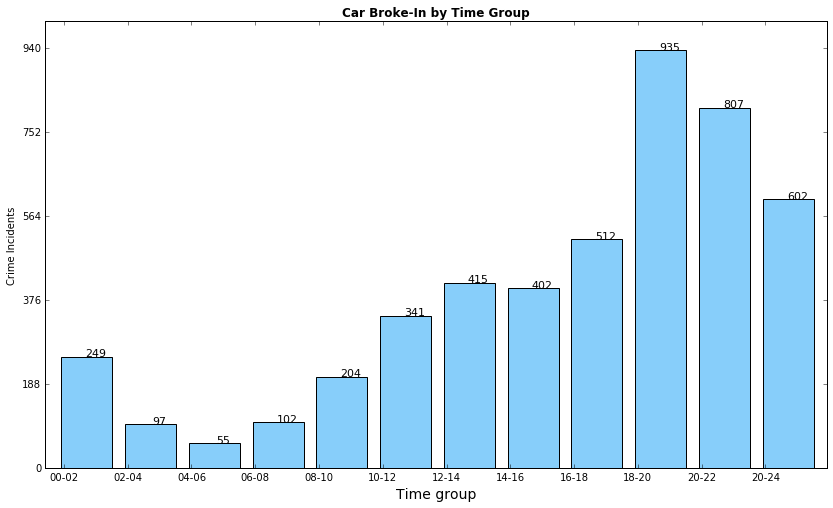

In [190]:
#crime_time = sf.groupby('Timegrp', agg.COUNT)
#
# Determine how wide each bar should appear.  A rough estimate w/ fudge factor
index = np.arange(len(theft_auto_time))
width = 1.0 / len(index)

# The Data used for this plot
crime_bar = plt.bar(index, theft_auto_time["Count"], color='lightskyblue')

# For the whole plot
plt.title('Car Broke-In by Time Group', fontsize=12, weight='bold')

# X-axis
plt.xlabel('Time group', fontsize=14)
plt.xticks(index + width/2., theft_auto_time["Timegrp"], fontsize=10)
plt.xlim(-.25, theft_auto_time.num_rows())

# Y-axis
plt.ylabel('Crime Incidents')
ymin = 0
ymax = round(theft_auto_time['Count'].max(), -1)
ytic = round((ymax-ymin) / 5., 0)
plt.yticks(np.arange(ymin,ymax+1,ytic))
#plt.grid(b=True, which='major', color='b', linestyle='-')

# Display the actual crime incident at the top of each bar

for ind in np.arange(len(theft_auto_time)):
    ind = int(ind)
    x = 0.5 + ind + width / 2.
    y = theft_auto_time['Count'][ind] + 0.25
    d = theft_auto_time['Count'][ind]
    plt.text(x, y, d, fontsize=11, ha='center')

Here, the number of thefts is at its highest during the hours of 16:00 - 20:00, which is surprising as one would assume car break-ins tend to happen at night.  But clearly the data suggest otherwise.  

One caveat worth noting here is that the "time" used here is the time the incident was reported to the police, not the actual time the break-in occurred.  So a break-in that occurred during the middle of the night most likely won't be noticed and reported by the owner until he/she reachs the car in the morning.  Similarly break-in during the day probably won't be noticed and reported until the owners reach the car, usually after getting off work, which is the most accessible explanation for the spike found at 18:00-20:00 hours.  

Regardless, the total number of incidents report from 08:00 to 20:00 is 2809, which is significantly higher than the 1612 reported from 20:00 to 08:00.

During the day, it is actually easier to observe what is in the car for the thieves.  

Now the question:

1. is there difference in terms of the PD District?

Let's see.

# 4. Distribution of Assaults

Assault is a broad category, but it is generally sufficient (at least for this exercise) to associate general assaults with violent crime that tends to be a characteristics of a "rough" neighborhood.  Or is it?

1. we are going to extract incidents that fall under teh category of Assault
2. do a scatter plot against the longitude and lattidue
3. and roughly get a sense of where the assault charges tend to occur


In [195]:
assault = sf.filter_by('ASSAULT', 'Category')
assault

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution
140734145,ASSAULT,BATTERY,Sunday,08/31/2014,22:58,MISSION,"ARREST, CITED"
140734214,ASSAULT,AGGRAVATED ASSAULT WITHBODILY FORCE ...,Sunday,08/31/2014,22:51,CENTRAL,NONE
140734123,ASSAULT,THREATS AGAINST LIFE,Sunday,08/31/2014,22:35,MISSION,NONE
140734010,ASSAULT,SHOOTING INTO INHABITEDDWELLING OR OCCUPIED ...,Sunday,08/31/2014,22:01,BAYVIEW,"ARREST, BOOKED"
140733965,ASSAULT,BATTERY,Sunday,08/31/2014,21:40,TENDERLOIN,"ARREST, BOOKED"
140733965,ASSAULT,THREATS AGAINST LIFE,Sunday,08/31/2014,21:40,TENDERLOIN,"ARREST, BOOKED"
140733909,ASSAULT,BATTERY WITH SERIOUSINJURIES ...,Sunday,08/31/2014,21:31,SOUTHERN,NONE
140733909,ASSAULT,AGGRAVATED ASSAULT WITH ADEADLY WEAPON ...,Sunday,08/31/2014,21:31,SOUTHERN,NONE
140733915,ASSAULT,AGGRAVATED ASSAULT WITH AKNIFE ...,Sunday,08/31/2014,21:16,MISSION,NONE
140733987,ASSAULT,ASSAULT,Sunday,08/31/2014,21:06,SOUTHERN,NONE


(37.7, 37.8)

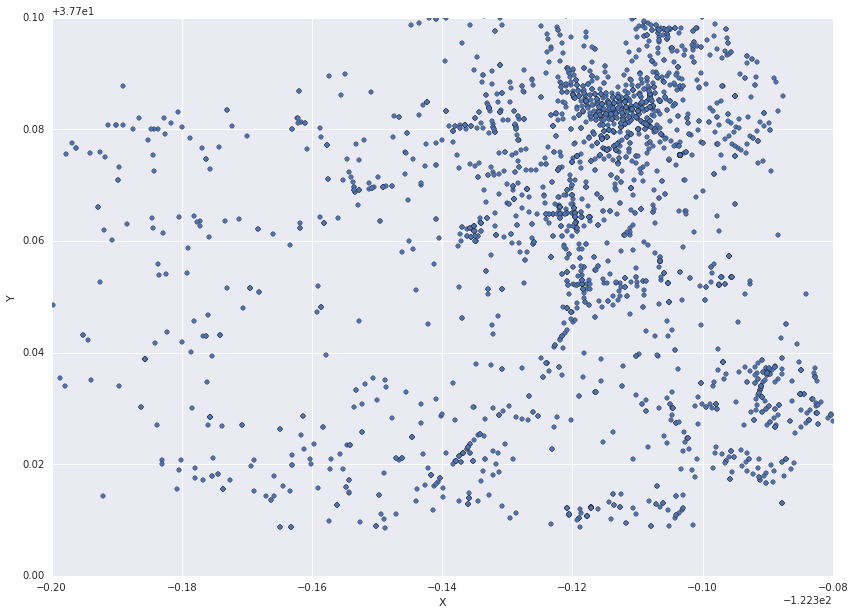

In [243]:
#sf.show(view="Scatter Plot", x="col1", y="col2")
# Southwest corner: (37.708539, -122.503183)
# Northeast corner: (37.809782, -122.384565) # In water
assault_np = gl.SFrame.to_dataframe(assault)

#assault.show(view="Scatter Plot", x="X", y="Y")
assault_np.plot(kind="scatter", x="X", y="Y", xlim=(-122.5, -122.38), ylim=(37.7, 37.8))
plt.xlim(-122.5, -122.38)
plt.ylim(37.7, 37.8)

### Since San Francisco is know as a city of "7x7", meaning, a rough 7 miles by 7 miles square, although in reality it's really not that square, but for our purpose it's good enough.

So the assaults tend to occur in the northeast and south east of the city.  Unless a map is overlayed, it's difficult to judge the exact location.  But for now, it's safe to assume most of the assault charges occur near Downtown, Tenderloin, Russian Hills, Nob Hills, Chinatown.  While predominantly residential areas like Sunset, Richmond, Cole Valley, Castro, Noe Valley see relatively little activity in this regard.  Not very precise, but at least it confirms one's intuition about SF.

### Instaed of plotting from matplotlib calls, I like to start using Seaborn and use that as the basis. So here is a testplot.  And boy it's a pain in the butt dealing w/ these plotting packages.  Just painful.

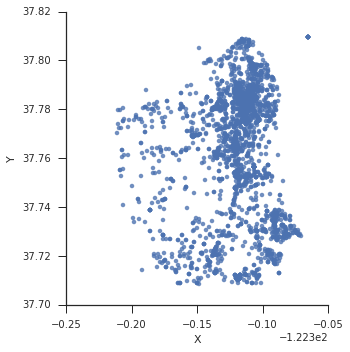

In [246]:
import seaborn as sns

sns.set(style="ticks")
sns.set(style="whitegrid", color_codes=True)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(14, 10))

axes = assc.axes

assc.set(ylim=(37.7, 37.8))
assc.set(xlim=(-122.5, -122.4))

assc=sns.lmplot("X", "Y", data=assault_np, fit_reg=False)
#sns.lmplot("x", "y", data=df, hue='dataset', fit_reg=False)

